# Multiple Linear Regression Using Normal Equation

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Load in data from Bureau of Meteorology on min/max temperature and sun exposure in Melbourne

In [2]:
# Read CSV data
min_temp = pd.read_csv('data/daily_min_temp_melbourne.csv')
max_temp = pd.read_csv('data/daily_max_temp_melbourne.csv')
solar_exp = pd.read_csv('data/daily_solar_exposure_melbourne.csv')

# Get only wanted columns
max_temp = max_temp[['Year', 'Month', 'Day', 'Maximum temperature (Degree C)']]
min_temp = min_temp[['Year', 'Month', 'Day', 'Minimum temperature (Degree C)']]
solar_exp = solar_exp[['Year', 'Month', 'Day', 'Daily global solar exposure (MJ/m*m)']]

# Rename columns
min_temp.columns = ['year', 'month', 'day', 'min_temp']
max_temp.columns = ['year', 'month', 'day', 'max_temp']
solar_exp.columns = ['year', 'month', 'day', 'solar_exp']

Merge dataframes on dates

In [3]:
min_max_temp = pd.merge(min_temp, max_temp, how='left', left_on=['year', 'month', 'day'], right_on=['year', 'month', 'day'])
df = pd.merge(min_max_temp, solar_exp, how='left', left_on=['year', 'month', 'day'], right_on=['year', 'month', 'day'])

Drop values without any data

In [4]:
print(f'Initial shape: {df.shape}')
df = df.dropna()
print(f'Final shape: {df.shape}')
df = df.reset_index()

Initial shape: (2076, 6)
Final shape: (1922, 6)


See overview of data

In [5]:
df.describe()

,index,year,month,day,min_temp,max_temp,solar_exp
count,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000
mean,1112.647763,2015.546306,6.552549,15.697190,11.599636,20.322112,14.531894
std,555.196170,1.565236,3.369736,8.812577,4.256284,6.202221,8.258867
min,152.000000,2013.000000,1.000000,1.000000,0.600000,9.000000,0.700000
25%,632.250000,2014.000000,4.000000,8.000000,8.600000,15.500000,7.800000
50%,1112.500000,2016.000000,7.000000,16.000000,11.300000,18.900000,12.300000
75%,1592.750000,2017.000000,9.000000,23.000000,14.500000,23.900000,20.900000
max,2074.000000,2018.000000,12.000000,31.000000,28.000000,43.400000,34.100000


Convert dataframes to numpy matrices

In [6]:
x_vals = df[['min_temp', 'solar_exp']]
x_vals.insert(0, 'Ones', 1)
y_vals = df['max_temp']

x_matrix = np.array(x_vals.values)
y_matrix = np.array(y_vals.values)

Calculate the predictors for max temperature when given a min temperature and solar exposure

In [7]:
predictors = np.dot(np.linalg.inv(np.dot(x_matrix.T, x_matrix)), np.dot(x_matrix.T, y_matrix.T))

Create a function for predicting arbritray max temperatures given a min and solar exposure value

In [8]:
def predict_max(min_temp, solar_exp):
    intercept = predictors[0]
    min_temp_coeff = predictors[1]
    solar_exp_coeff = predictors[2]
    return intercept + min_temp * min_temp_coeff + solar_exp * solar_exp_coeff

Plot the data!

<IPython.core.display.Javascript object>


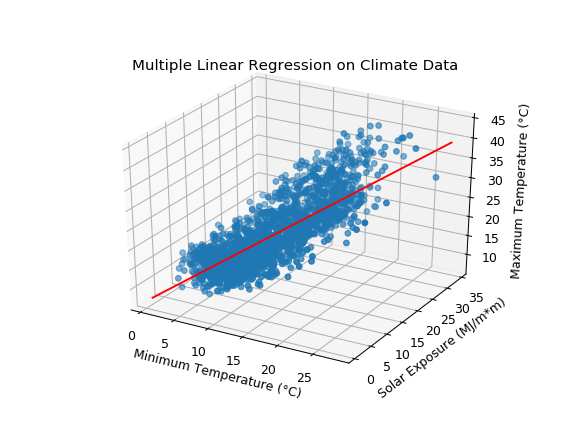

Text(0.5,0,'Maximum Temperature (°C)')

In [9]:
# Make plot interactable
%matplotlib notebook

# Get points to plot regression line
x1 = np.linspace(df['min_temp'].min(), df['min_temp'].max())
y1 = np.linspace(df['solar_exp'].min(), df['solar_exp'].max())
z1 = predict_max(x1, y1)

# Set up 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df['min_temp'], df['solar_exp'], df['max_temp'])

# Plot regression line
ax.plot(x1, y1, z1, color='red')

# Label title and axis
ax.set_title('Multiple Linear Regression on Climate Data')
ax.set_xlabel('Minimum Temperature (°C)')
ax.set_ylabel('Solar Exposure (MJ/m*m)')
ax.set_zlabel('Maximum Temperature (°C)')